In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import operator

In [2]:
train = pd.read_csv('./data/train_cleaned.csv')
test = pd.read_csv('./data/test_cleaned.csv')
print("Training Data consists of {0} rows and {1} columns", train.shape[0], train.shape[1])
print("Testing Data consists of {0} rows and {1} columns", test.shape[0], test.shape[1])

Training Data consists of {0} rows and {1} columns 5871405 25
Testing Data consists of {0} rows and {1} columns 9914 24


In [3]:
drop_columns = ['key', 'pickup_datetime', 'pickup_date']

In [4]:
train_1 = train.drop(drop_columns,axis=1)
test_1 = test.drop(drop_columns,axis=1)

In [5]:
print("Training Data consists of {0} rows and {1} columns", train_1.shape[0], train_1.shape[1])
print("Testing Data consists of {0} rows and {1} columns", test_1.shape[0], test_1.shape[1])

Training Data consists of {0} rows and {1} columns 5871405 22
Testing Data consists of {0} rows and {1} columns 9914 21


In [6]:
# One hot encoding
train_1 = pd.get_dummies(train_1)
test_1 = pd.get_dummies(test_1)

print("Training Data consists of {0} rows and {1} columns", train_1.shape[0], train_1.shape[1])
print("Testing Data consists of {0} rows and {1} columns", test_1.shape[0], test_1.shape[1])

Training Data consists of {0} rows and {1} columns 5871405 32
Testing Data consists of {0} rows and {1} columns 9914 31


In [7]:
X = train_1.drop(['fare_amount'],axis=1)
y = train_1['fare_amount']

In [20]:
# Split data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Number of records in training data ", X_train.shape[0])
print("Number of records in validation data ", X_test.shape[0])

Number of records in training data  4697124
Number of records in validation data  1174281


### Linear Regression

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
linear_model_root_MSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error for Linear Regression is ", linear_model_root_MSE)

Root Mean Squared Error for Linear Regression is  4.843381773204673


In [10]:
linear_pred = linear_model.predict(test_1)
submissions = pd.read_csv('./data/sample_submission.csv')
submissions['fare_amount'] = linear_pred
submissions.to_csv("LinearRegression_Baseline.csv", index = False)

### XGBoost

In [11]:
def XGBoost(X_train, X_test, y_train, y_test, num_rounds = 300):
    dtrain = xgb.DMatrix(X_train, label = y_train)
    dtest = xgb.DMatrix(X_test, label = y_test)

    return xgb.train(params = {'objective': 'reg:linear', 
                             'eval_metric':'rmse'},
                     dtrain = dtrain,
                     num_boost_round = num_rounds, 
                     early_stopping_rounds = 20,
                     evals = [(dtest,'test')])

In [12]:
xgbm = XGBoost(X_train, X_test, y_train, y_test)
xgbm_pred = xgbm.predict(xgb.DMatrix(test_1), ntree_limit = xgbm.best_ntree_limit)
submissions['fare_amount'] = xgbm_pred
submissions.to_csv("XGboost_Baseline.csv", index = False)

[11:56:40] WARNING: C:\Users\Administrator\Desktop\xgboost\src\learner.cc:685: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	test-rmse:10.6438
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:8.07141
[2]	test-rmse:6.43212
[3]	test-rmse:5.44602
[4]	test-rmse:4.8737
[5]	test-rmse:4.55269
[6]	test-rmse:4.35108
[7]	test-rmse:4.24899
[8]	test-rmse:4.18505
[9]	test-rmse:4.13342
[10]	test-rmse:4.10137
[11]	test-rmse:4.08325
[12]	test-rmse:4.06009
[13]	test-rmse:4.04199
[14]	test-rmse:4.03328
[15]	test-rmse:4.01555
[16]	test-rmse:4.00859
[17]	test-rmse:4.00167
[18]	test-rmse:3.99166
[19]	test-rmse:3.98721
[20]	test-rmse:3.98231
[21]	test-rmse:3.97814
[22]	test-rmse:3.97317
[23]	test-rmse:3.96324
[24]	test-rmse:3.95705
[25]	test-rmse:3.95437
[26]	test-rmse:3.95117
[27]	test-rmse:3.94465
[28]	test-rmse:3.94238
[29]	test-rmse:3.93414
[30]	test-rmse:3.9304


Text(0.5,1,'Feature Importance')

<Figure size 432x288 with 0 Axes>

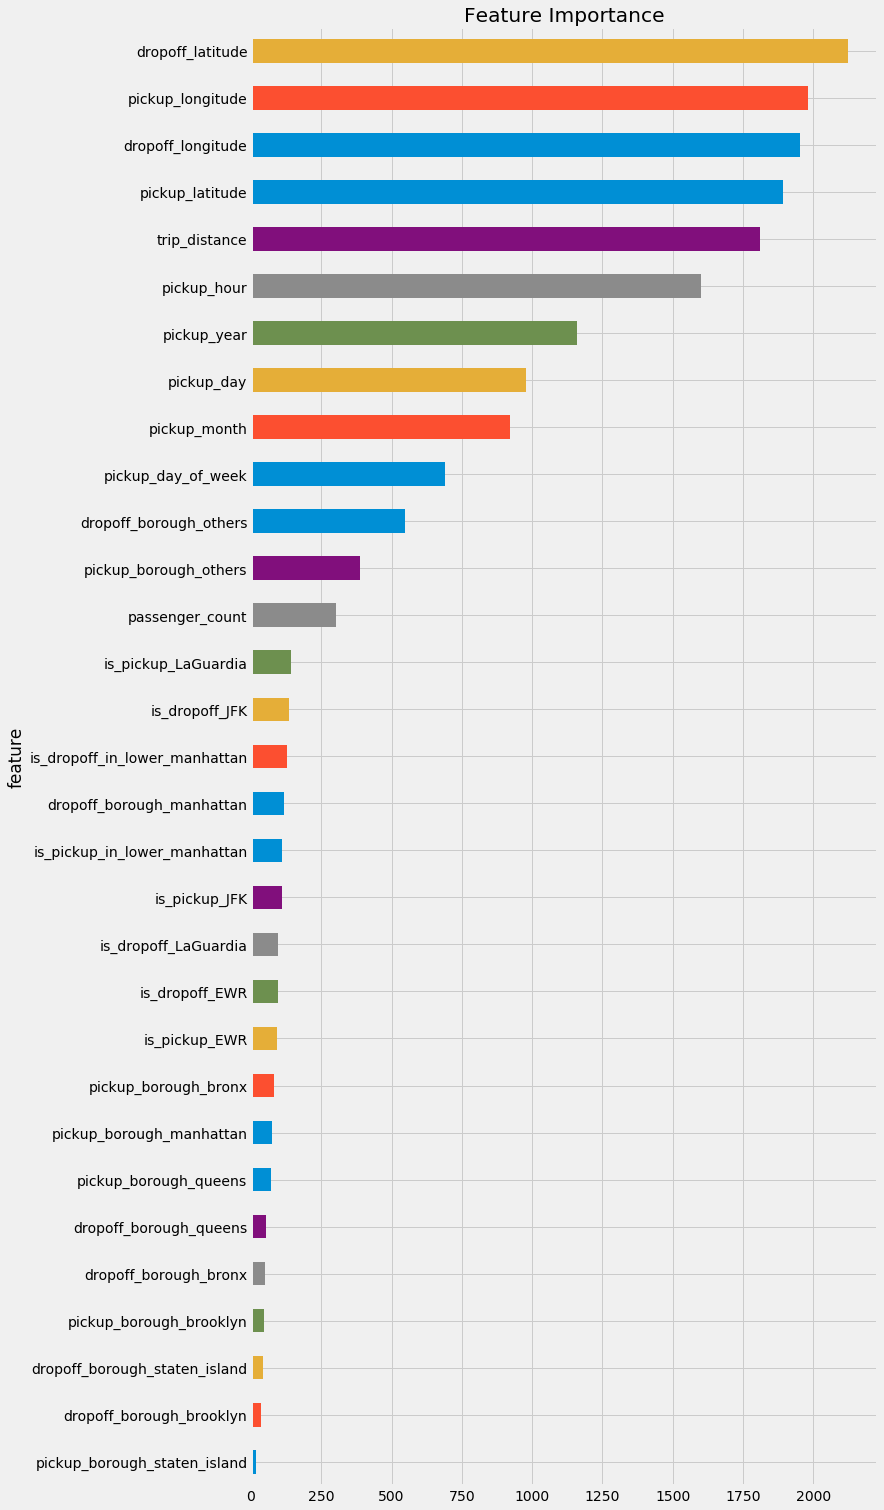

In [16]:
importance = xgbm.get_score()
importance = sorted(importance.items(), key = operator.itemgetter(1))
df = pd.DataFrame(importance, columns = ['feature', 'score'])
plt.figure()

df.plot(kind = 'barh', x = 'feature', y = 'score', legend = False, figsize = (10, 25))
plt.title("Feature Importance")

In [ ]:
del train_1
del test_1
del X_train, X_test, y_train, y_test

Training Data consists of {0} rows and {1} columns 5871405 28
Testing Data consists of {0} rows and {1} columns 9914 27
Training Data consists of {0} rows and {1} columns 5871405 38
Testing Data consists of {0} rows and {1} columns 9914 37
Number of records in training data  4697124
Number of records in validation data  1174281
[14:44:59] WARNING: C:\Users\Administrator\Desktop\xgboost\src\learner.cc:685: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	test-rmse:10.5954
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:8.02598
[2]	test-rmse:6.38789
[3]	test-rmse:5.39085
[4]	test-rmse:4.79717
[5]	test-rmse:4.45579
[6]	test-rmse:4.26974
[7]	test-rmse:4.16511
[8]	test-rmse:4.09551
[9]	test-rmse:4.05384
[10]	test-rmse:4.01465
[11]	test-rmse:3.9916
[12]	test-rmse:3.97919
[13]	test-rmse:3.94872
[14]	test-rmse:3.94381
[15]	test-rmse:3.9355
[16]	test-rmse:

<Figure size 432x288 with 0 Axes>

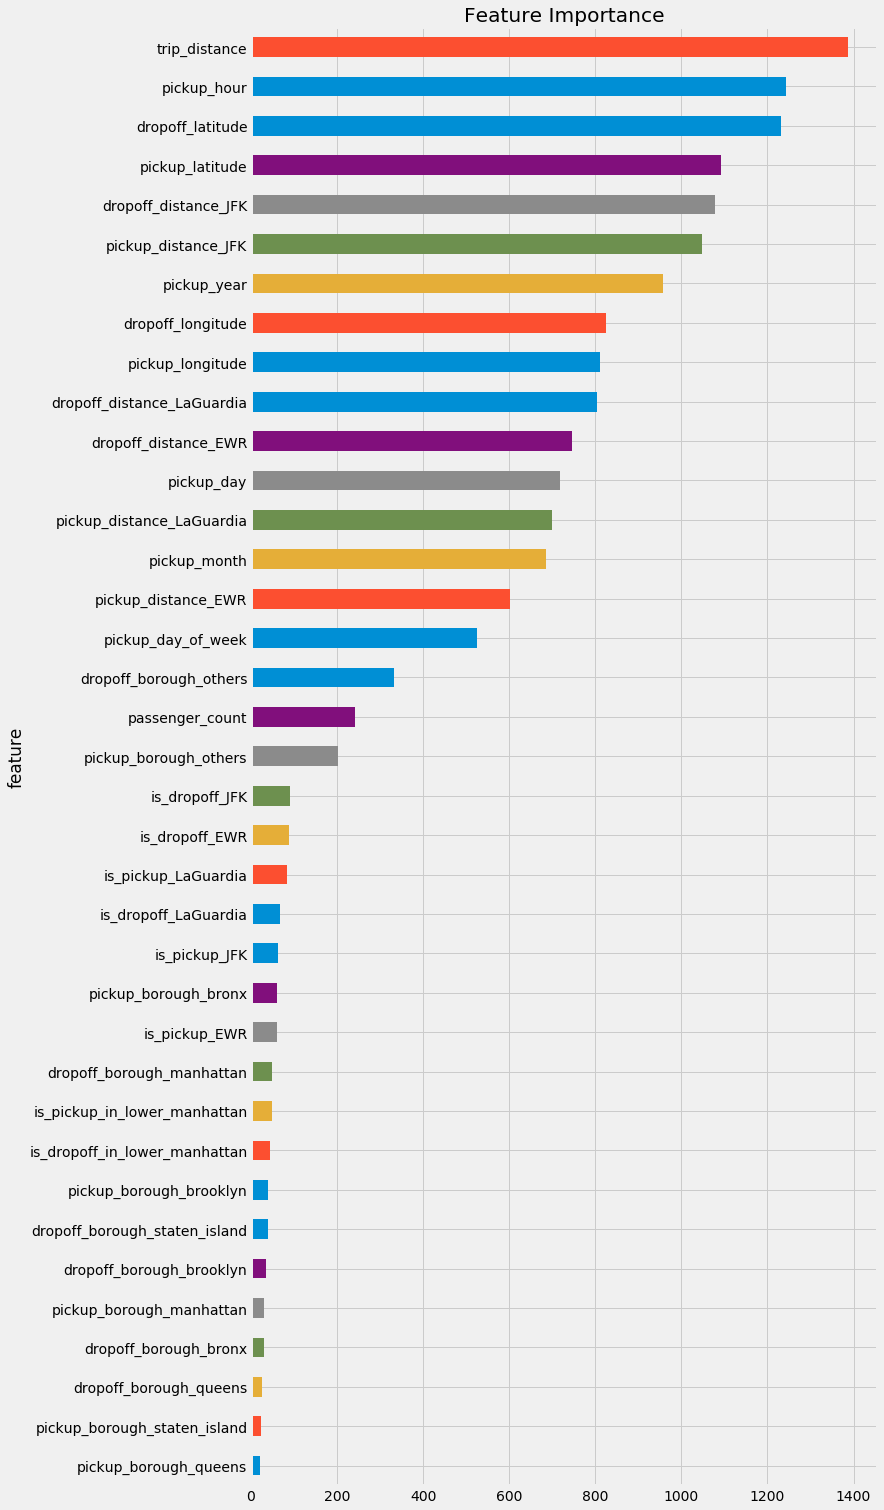

In [23]:
# Add new columns based on trip distance to test and train set and re-run XGBoost

LGR = (-73.8733, 40.7746)
JFK = (-73.7900, 40.6437)
EWR = (-74.1843, 40.6924)

def trip_distance(lat1, lon1, lat2, lon2):
    """
    Calculate distance between two points
    Args:
        lat1: Latitude of point 1
        lon1: Longitude of point 1
        lat2: Latitude of point 2
        lon2: Longitude of point 2
    Returns:
        Distance between the two points in miles
    """
    # Pi/180
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

test['pickup_distance_JFK'] = test.apply(lambda record:
                                         trip_distance(record['pickup_latitude'],
                                                       record['pickup_longitude'],
                                                       JFK[1],
                                                       JFK[0]),axis=1)

test['dropoff_distance_JFK'] = test.apply(lambda record:
                                        trip_distance(record['dropoff_latitude'],
                                                      record['dropoff_longitude'],
                                                      JFK[1],
                                                      JFK[0]),axis=1)

test['pickup_distance_EWR'] = test.apply(lambda record:
                                         trip_distance(record['pickup_latitude'],
                                                       record['pickup_longitude'],
                                                       EWR[1],
                                                       EWR[0]),axis=1)

test['dropoff_distance_EWR'] = test.apply(lambda record:
                                          trip_distance(record['dropoff_latitude'],
                                                        record['dropoff_longitude'],
                                                        EWR[1],
                                                        EWR[0]),axis=1)

test['pickup_distance_LaGuardia'] = test.apply(lambda record:
                                               trip_distance(record['pickup_latitude'],
                                                             record['pickup_longitude'],
                                                             LGR[1],
                                                             LGR[0]),axis=1)

test['dropoff_distance_LaGuardia'] = test.apply(lambda record:
                                                trip_distance(record['dropoff_latitude'],
                                                              record['dropoff_longitude'],
                                                              LGR[1],
                                                              LGR[0]),axis=1)

train['pickup_distance_JFK'] = train.apply(lambda record:
                                         trip_distance(record['pickup_latitude'],
                                                       record['pickup_longitude'],
                                                       JFK[1],
                                                       JFK[0]),axis=1)

train['dropoff_distance_JFK'] = train.apply(lambda record:
                                        trip_distance(record['dropoff_latitude'],
                                                      record['dropoff_longitude'],
                                                      JFK[1],
                                                      JFK[0]),axis=1)

train['pickup_distance_EWR'] = train.apply(lambda record:
                                         trip_distance(record['pickup_latitude'],
                                                       record['pickup_longitude'],
                                                       EWR[1],
                                                       EWR[0]),axis=1)

train['dropoff_distance_EWR'] = train.apply(lambda record:
                                          trip_distance(record['dropoff_latitude'],
                                                        record['dropoff_longitude'],
                                                        EWR[1],
                                                        EWR[0]),axis=1)

train['pickup_distance_LaGuardia'] = train.apply(lambda record:
                                               trip_distance(record['pickup_latitude'],
                                                             record['pickup_longitude'],
                                                             LGR[1],
                                                             LGR[0]),axis=1)

train['dropoff_distance_LaGuardia'] = train.apply(lambda record:
                                                trip_distance(record['dropoff_latitude'],
                                                              record['dropoff_longitude'],
                                                              LGR[1],
                                                              LGR[0]),axis=1)


train_1 = train.drop(drop_columns,axis=1)
test_1 = test.drop(drop_columns,axis=1)

print("Training Data consists of {0} rows and {1} columns", train_1.shape[0], train_1.shape[1])
print("Testing Data consists of {0} rows and {1} columns", test_1.shape[0], test_1.shape[1])

# One hot encoding
train_1 = pd.get_dummies(train_1)
test_1 = pd.get_dummies(test_1)

print("Training Data consists of {0} rows and {1} columns", train_1.shape[0], train_1.shape[1])
print("Testing Data consists of {0} rows and {1} columns", test_1.shape[0], test_1.shape[1])

X = train_1.drop(['fare_amount'], axis = 1)
y = train_1['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Number of records in training data ", X_train.shape[0])
print("Number of records in validation data ", X_test.shape[0])

xgbm = XGBoost(X_train, X_test, y_train, y_test, num_rounds = 1500)
xgbm_pred = xgbm.predict(xgb.DMatrix(test_1), ntree_limit = xgbm.best_ntree_limit)

submissions['fare_amount'] = xgbm_pred
submissions.to_csv("XGboost_WithDistancetoAirport.csv", index = False)

importance = xgbm.get_score()
importance = sorted(importance.items(), key = operator.itemgetter(1))
df = pd.DataFrame(importance, columns = ['feature', 'score'])
plt.figure()

df.plot(kind = 'barh', x = 'feature', y = 'score', legend = False, figsize = (10, 25))
plt.title("Feature Importance")

train.to_csv("./data/train_cleaned.csv",index = False)
test.to_csv("./data/test_cleaned.csv",index = False)